# Analyses for Ecology of Histidine Kinases


## Dependencies and data

In [45]:
#display inline
%matplotlib inline

#general
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from math import log, sqrt
import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO
import seaborn as sns

#Bokeh
from bokeh.plotting import figure, show, output_file, save
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.palettes import brewer, Category20, Plasma, Colorblind
from bokeh.models.mappers import LinearColorMapper
from bokeh.palettes import Dark2_5 as palette
from bokeh.resources import INLINE

#scipy
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

Read in the TCS gene data for marine bacteria

In [41]:
df = pd.read_csv('marineTCSdata.csv')
df.head()

,Genome Name,RR:HPKratio,HPK,RR,unit_norm_hkct,unit_norm_genect,Genome Size * assembled,Gene Count * assembled,hpkper100gene,HybridHPK,...,Family,Genus,Species,Ecosystem,Ecosystem Category,Ecosystem Subtype,Ecosystem Type,Ecotype,Habitat,Phylum2
0,Zooshikella ganghwensis DSM 15267,1.307692,52,68.0,0.017639,1.827344,5798664,5387,0.965287,12.0,...,Hahellaceae,Zooshikella,Zooshikella ganghwensis,Environmental,Aquatic,Intertidal zone,Marine,NaN,"Aquatic, Marine, Sediment",not
1,Woodsholea maritima DSM 17123,1.236842,38,47.0,0.012890,1.003394,3105947,2958,1.284652,NaN,...,Hyphomonadaceae,Woodsholea,Woodsholea maritima,Environmental,Aquatic,Intertidal zone,Marine,NaN,"Aquatic, Estuaries",not
2,Wenxinia marina DSM 24838,1.000000,30,30.0,0.010176,1.392133,4175892,4104,0.730994,NaN,...,Rhodobacteraceae,Wenxinia,Wenxinia marina,Environmental,Aquatic,Oceanic,Marine,NaN,"Aquatic, Marine, Oil fields, Sediment",not
3,Vibrio splendidus 12B01,1.263158,57,72.0,0.019335,1.813436,5596386,5346,1.066218,63.0,...,Vibrionaceae,Vibrio,Vibrio splendidus,Environmental,Aquatic,Unclassified,Marine,NaN,"Marine, Surface water",not
4,Vibrio sp. MED222,1.372549,51,70.0,0.017300,1.605498,4891901,4733,1.077541,66.0,...,Vibrionaceae,Vibrio,Vibrio sp. MED222,Environmental,Aquatic,Unclassified,Marine,NaN,"Aquatic, Marine",not


Read in the TCS gene data for reference bacteria

In [48]:
refdf = pd.read_csv('finalrefdata.csv')

## Figure 2. Distribution of histidine kinases by genome class

In [7]:
n=0
classDict = {}
classList = []
colors = Category20[19]
colors.append('#4ca6a6')
colors.append('#99cccc')
colors.append('#551A8B')
colors.append('#4ca6a6')
print(colors)
for group in df.groupby('ForColors').groups.keys():
    classDict[group] = n
    n += 1
    classList.append(group)
    print(group)
print(classList)
for index, row in df.iterrows():
    df.loc[index,'Class Number'] = classDict[row['ForColors']]
    df.loc[index,'Class Color']= colors[classDict[row['ForColors']]]

    
import itertools
from bokeh.palettes import Dark2_5 as palette
from bokeh.resources import INLINE

#sort df by Phylum
#print(df.head())
#df = df.sort_values(by=['ForColors']).reset_index()
#print(df.head())

width = 700
height = 700
inner_radius = 25

minr = 0
maxr = 150+25

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle

def rad(mic):
    return mic+25
    
p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-150, 150), y_range=(-150, 150),
    min_border=0, outline_line_color="#A9A9A9",
    toolbar_sticky=False)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.annular_wedge(0, 0, inner_radius, rad(df['HPK']),
        -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
        color=df['Class Color'])

p.rect([-135,-135,-135,-135,-25,-25,-25,-25,65,65,65,65],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143],width=7,height=5, color=colors)
p.text([-130,-130,-130,-130,-20,-20,-20,-20,70,70,70,70],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-14], text=classList,text_font_size='11pt', text_align='left',text_baseline='middle')

# circular axes and labels
labels = np.array([5,25,50,100])
radii = rad(labels)
p.circle(0, 0, radius=radii, fill_color=None, line_color="gray")
p.text(0, radii, [str(r) for r in labels],
       text_font_size="10pt", text_align="center", text_baseline="middle")
show(p)


['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6']
Alphaproteobacteria
Bacteroidetes
Betaproteobacteria
Cyanobacteria
Deltaproteobacteria
Epsilonproteobacteria
Firmicutes
Gammaproteobacteria
Other
Pelagibacter
Prochlorococcus
Synechococcales
['Alphaproteobacteria', 'Bacteroidetes', 'Betaproteobacteria', 'Cyanobacteria', 'Deltaproteobacteria', 'Epsilonproteobacteria', 'Firmicutes', 'Gammaproteobacteria', 'Other', 'Pelagibacter', 'Prochlorococcus', 'Synechococcales']


/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 27), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 27), ('line_color', 27), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/s

## Figure 3. Hierarchical clustering of genomes by number of HPKs and genome size

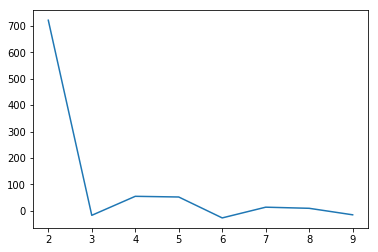

clusters: 2


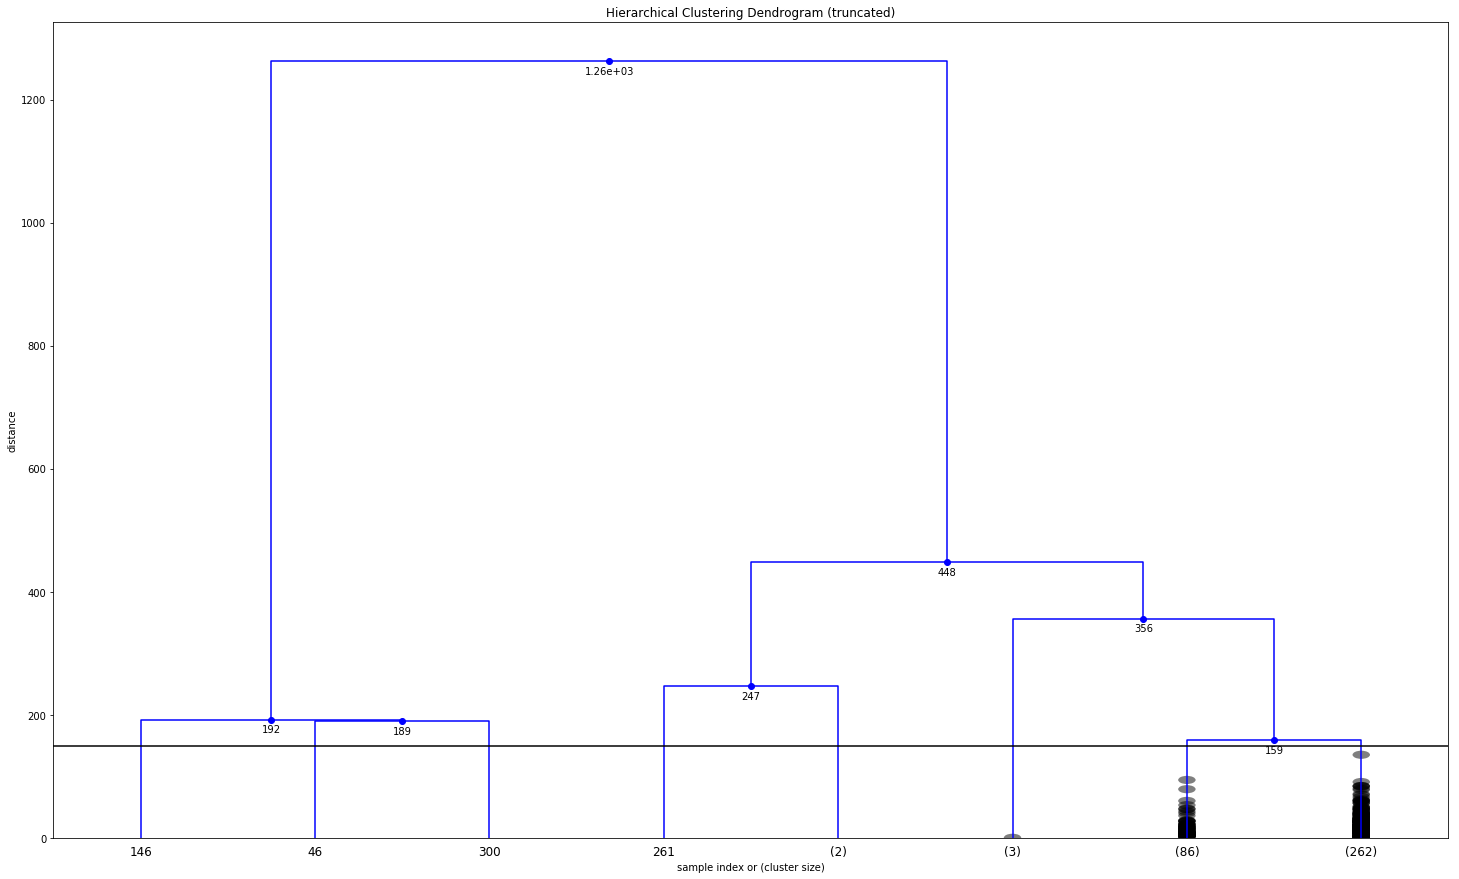

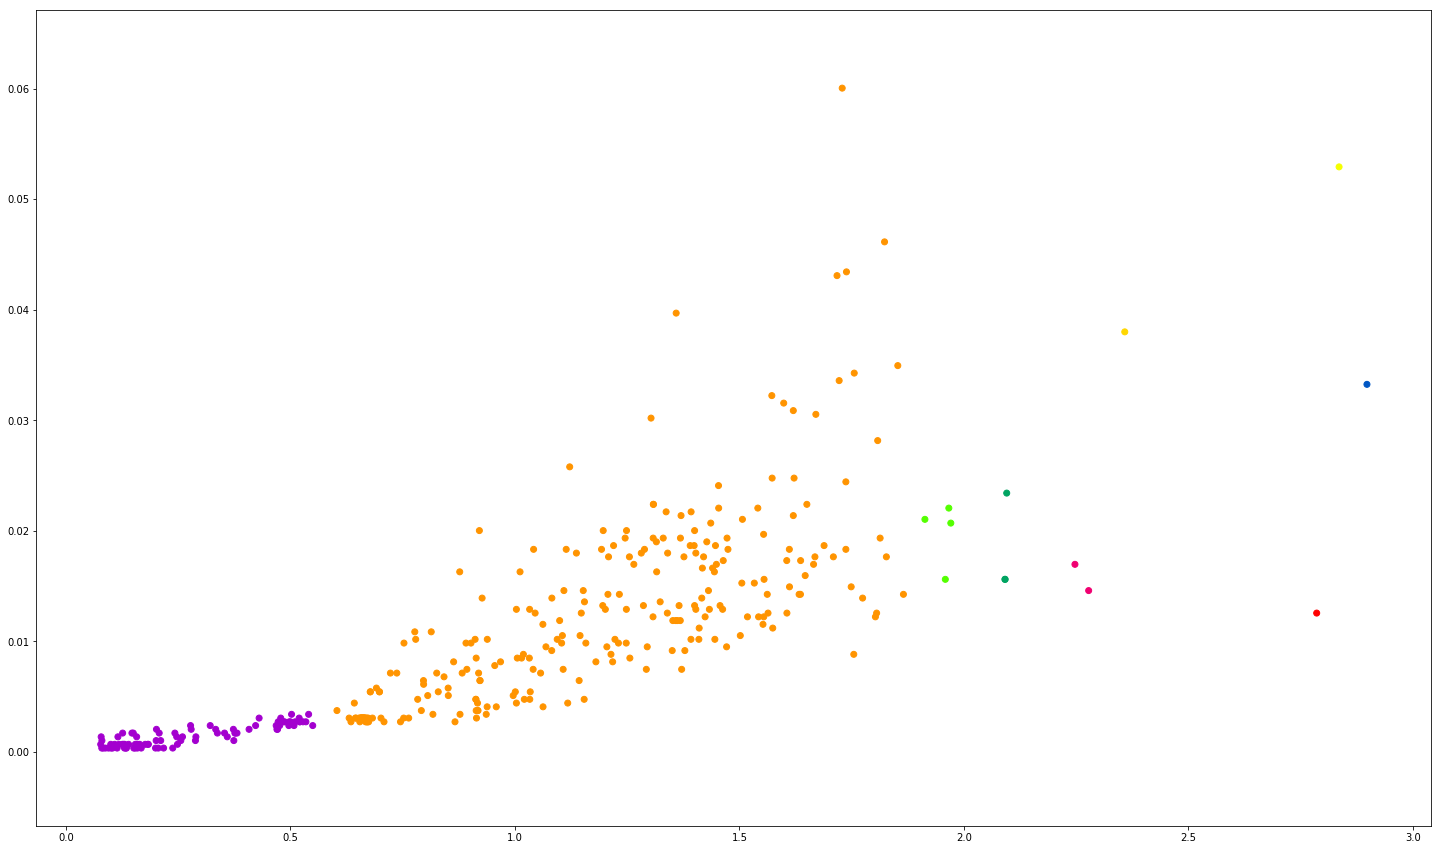

In [24]:
#generate a dendrogram to assist in selecting the number of clusters
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

#format data and perform ward hierarchical clustering
ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
X = df.loc[:,['unit_norm_genect', 'unit_norm_hkct']]
data = X.as_matrix()
ward.fit(data)
labels = ward.labels_
X['label'] = labels

#elbow plot
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

#draw the dendrogram
Y = df.loc[:,['Gene Count   * assembled', 'HPK']]
data = Y.as_matrix()
fig4, ax4 = plt.subplots(figsize=(25,15))
Z = linkage(data)
fancy_dendrogram(Z, truncate_mode='lastp', p=8, show_contracted=True, max_d=150) 
#here is where # of clusters is selected
k=9
clusters = fcluster(Z, k, criterion='maxclust')
df['clusters'] = clusters
df.to_csv('trial.csv')

#plot results of the clustering analysis
fig5, ax5 = plt.subplots(figsize=(25,15))
plt.scatter(X['unit_norm_genect'], X['unit_norm_hkct'], c=clusters, cmap='prism')  # plot points with cluster dependent colors


## Figure 4. Proportion of hybrid histidine kinases 

In [52]:

n=0
classDict = {}
classList = []
colors = Category20[19]
colors.append('#4ca6a6')
colors.append('#99cccc')
colors.append('#551A8B')
colors.append('#4ca6a6')
print(colors)


b = figure(plot_width=400, plot_height=400)
x=refdf['hamp_hk']
y=refdf['HybridHPK']
x2 = df['HPK']
y2 = df['HybridHPK']
b.scatter(x, y, size=4, color='#67a9cf', legend='reference')
b.scatter(x2, y2, size=4, color='#ef8a62', legend='marine')
b.xaxis.axis_label = 'No. Histidine Kinases'
b.yaxis.axis_label = 'No. Hybrid Histidine Kinases'
b.xaxis.axis_label_text_font_size = "12pt"
b.yaxis.axis_label_text_font_size = "12pt"
b.xaxis.major_label_text_font_size = "10pt"
b.yaxis.major_label_text_font_size = "10pt"

c_y2 = [0,36.36] #r is 0.360
c_y = [0,58.536]
c_x = [0,180] #r is 0.724
b.line(c_x, c_y2, color='#67a9cf')
b.line(c_x, c_y, color='#ef8a62')


show(b)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6']


## Figure 5. RR:HPK Ratio in marine and reference bacteria (includes bootstrapped analysis)

In [39]:
import pandas as pd
import scipy  
import scikits.bootstrap as bootstrap  
import numpy as np
from bokeh.transform import factor_cmap
from bokeh.palettes import Colorblind, Spectral6, Accent
from bokeh.models import ColumnDataSource, Whisker

marine = df
reference = refdf
palette = Colorblind[3]

#perform bootstrap analysis
CIs = bootstrap.ci(data=marine['RR:HPKratio'].dropna(), statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals\nLow:", CIs[0], "\nHigh:", CIs[1]) 
print(np.mean(marine['RR:HPKratio']))

CIs = bootstrap.ci(data=reference['RR:HPKratio'].dropna(), statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals\nLow:", CIs[0], "\nHigh:", CIs[1]) 
print(np.mean(reference['RR:HPKratio']))

bootdf = pd.DataFrame(columns=['name', 'average', 'high', 'low'])
bootdf['name'] = ['marine', 'all\necosystems']
bootdf['average'] = [0.8304226855686274, 0.9842532234404523]
bootdf['high'] = [0.87919030191, 1.00355770851]
bootdf['low'] = [0.779255070364, 0.964392451996]
bootdf['color'] = [palette[1], palette[0]]
nameList = ['marine', 'all\necosystems']

r = figure(plot_width=500, plot_height=500, x_range=['marine', 'all\necosystems'], y_range=(0,1.2))
source = ColumnDataSource(ColumnDataSource.from_df(bootdf))
r.vbar(x='name', width=0.5, bottom=0, top='average', source=source, color='color')
r.xaxis.major_label_orientation = 1
r.xaxis.axis_label_text_font_size = "16pt"
r.yaxis.axis_label_text_font_size = "16pt"
r.xaxis.major_label_text_font_size = "12pt"
r.yaxis.major_label_text_font_size = "12pt"
r.yaxis.axis_label = 'Average RR:HPK Ratio'
r.add_layout(
    Whisker(source=source, base="name", upper="high", lower="low", level="overlay", line_width=2)
)

show(r)


Bootstrapped 95% confidence intervals
Low: 0.7791169547507003 
High: 0.8794686228739496
0.8304226855686277
Bootstrapped 95% confidence intervals
Low: 1.218298269702506 
High: 1.2498693882764753
1.2338994557825393


## Figure 6. Violin plot of TCS genes in Proteobacteria and Cyanobacteria (example)

357


/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


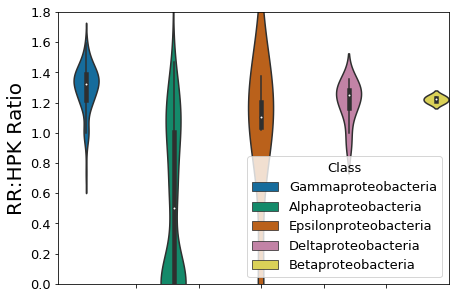

In [44]:
font = {'family' : 'normal',
        'size'   : 13}
plt.rc('font', **font)

grouped = df.groupby('Phylum')
for name, group in grouped:
    if name == "Proteobacteria":
        k = group
print(len(df))
fig, ax = plt.subplots(figsize=(7,5))
#ax.set_xticks(['1', 'Deltaproteobactria','Epsilonproteobacteria','Gammaproteobacteria','Betaproteobacteria'])
sns.violinplot(x='Class', y="RR:HPKratio", hue="Class", data=k, palette="colorblind", width=2)
plt.ylabel(s=14)
plt.ylabel('RR:HPK Ratio', fontsize=20) 
#plt.xticks(['Alphaproteobacteria', 'Deltaproteobactria','Epsilonproteobacteria','Gammaproteobacteria','Betaproteobacteria'])
plt.xlabel("")
plt.subplots_adjust(hspace = 1)
ax.set_xticklabels([])
plt.xlim(-1.25, 5)
plt.ylim(0,1.8)

plt.show()
